In [71]:
import scanpy as sc
import anndata
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
import numpy as np
import os
import pandas as pd


In [72]:
import matplotlib.pyplot as plt

In [73]:
# load sparse matrix:
X = io.mmread("counts2.mtx")

# create anndata object
adata = anndata.AnnData(
    X=X.transpose().tocsr()
)


In [74]:
# load cell metadata:
cell_meta = pd.read_csv("metadata2.csv")

# load gene names:
with open("gene_names2.csv", 'r') as f:
    gene_names = f.read().splitlines()

# set anndata observations and index obs by barcodes, var by gene names
adata.obs = cell_meta
adata.obs.index = adata.obs['barcode']
adata.var.index = gene_names


In [75]:
adata

AnnData object with n_obs × n_vars = 369 × 13306
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent_mito', 'percent_ribo', 'log10GenesPerUMI', 'pANN_0.25_0.11_28', 'DF.classifications_0.25_0.11_28', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'CC.Difference', 'AUC', 'S_G2M_AUC', 'RNA_snn_res.0.1', 'seurat_clusters', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.6', 'RNA_snn_res.0.8', 'RNA_snn_res.1', 'PC_1', 'PC_2', 'PC_3', 'PC_4', 'barcode', 'DC_1', 'DC_2'

In [76]:
adata.obsm

AxisArrays with keys: 

In [77]:
# load dimensional reduction:
pca = pd.read_csv("pca2.csv")
pca.index = adata.obs.index

# set pca and umap
adata.obsm['X_pca'] = pca.to_numpy()
adata.obsm['X_umap'] = np.vstack((adata.obs['DC_1'].to_numpy(), adata.obs['DC_2'].to_numpy())).T


In [78]:
adata

AnnData object with n_obs × n_vars = 369 × 13306
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent_mito', 'percent_ribo', 'log10GenesPerUMI', 'pANN_0.25_0.11_28', 'DF.classifications_0.25_0.11_28', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'CC.Difference', 'AUC', 'S_G2M_AUC', 'RNA_snn_res.0.1', 'seurat_clusters', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.6', 'RNA_snn_res.0.8', 'RNA_snn_res.1', 'PC_1', 'PC_2', 'PC_3', 'PC_4', 'barcode', 'DC_1', 'DC_2'
    obsm: 'X_pca', 'X_umap'

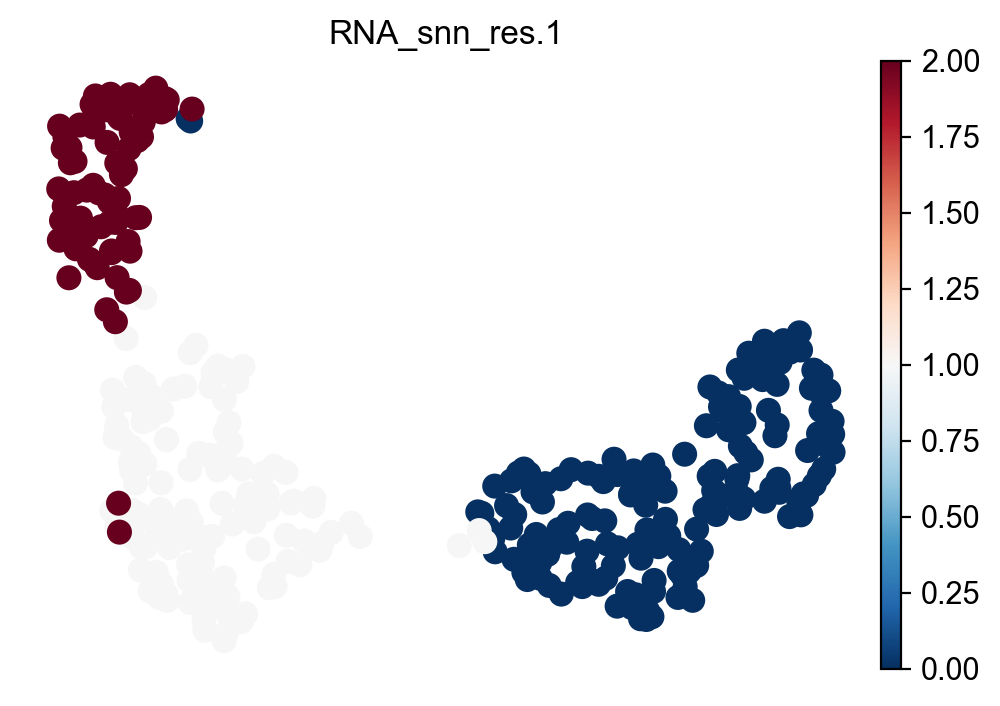

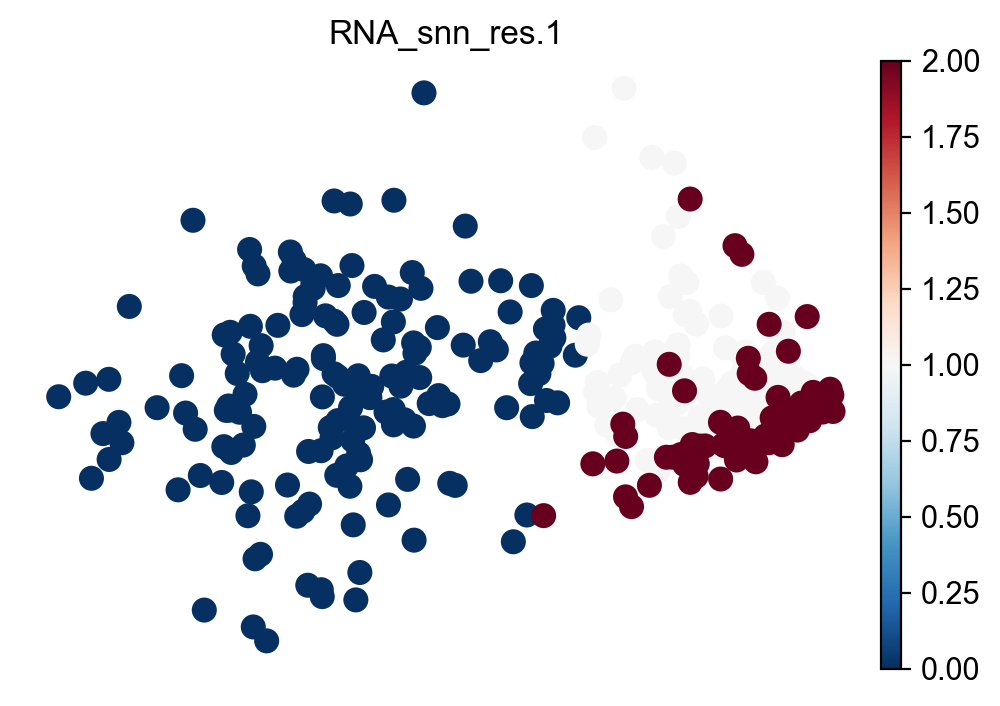

In [79]:
# plot a UMAP colored by sampleID to test:
sc.pl.umap(adata, color=['RNA_snn_res.1'], frameon=False, save=True)
# plot a UMAP colored by sampleID to test:
sc.pl.pca(adata, color=['RNA_snn_res.1'], frameon=False, save=True)

# save dataset as anndata format
adata.write('my_data2.h5ad')

# reload dataset
adata = sc.read_h5ad('my_data2.h5ad')

In [80]:
#load data 
import scvelo as scv
import scanpy as sc
import cellrank as cr
import numpy as np
import pandas as pd
import anndata as ad

In [81]:
scv.settings.verbosity = 3
scv.settings.set_figure_params('scvelo', facecolor='white', dpi=100, frameon=False)
cr.settings.verbosity = 2

In [82]:
adata = sc.read_h5ad('my_data2.h5ad')


In [83]:
ldata1 = scv.read('/disk1/xilu/collaborate/xiaonan/single_RNA/rna_velocity_077/possorted_genome_bam_OUESV.loom', cache=True)


/disk1/xilu/software/Miniconda3/envs/R-4/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [84]:
barcodes = [bc.split(':')[1] for bc in ldata1.obs.index.tolist()]
barcodes = [bc[0:len(bc)-1] + '-6' for bc in barcodes]
ldata1.obs.index = barcodes

In [85]:
ldata1

AnnData object with n_obs × n_vars = 369 × 62696
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [86]:
# make variable names unique
ldata1.var_names_make_unique()


/disk1/xilu/software/Miniconda3/envs/R-4/lib/python3.9/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


In [87]:
# concatenate the three loom
#ldata = ldata1.concatenate([ldata1])
# merge matrices into the original adata object
adata = scv.utils.merge(adata, ldata1)



In [88]:
ldata1

AnnData object with n_obs × n_vars = 369 × 62696
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [89]:
adata

AnnData object with n_obs × n_vars = 369 × 12241
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent_mito', 'percent_ribo', 'log10GenesPerUMI', 'pANN_0.25_0.11_28', 'DF.classifications_0.25_0.11_28', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'CC.Difference', 'AUC', 'S_G2M_AUC', 'RNA_snn_res.0.1', 'seurat_clusters', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.6', 'RNA_snn_res.0.8', 'RNA_snn_res.1', 'PC_1', 'PC_2', 'PC_3', 'PC_4', 'barcode', 'DC_1', 'DC_2', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'X_pca', 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

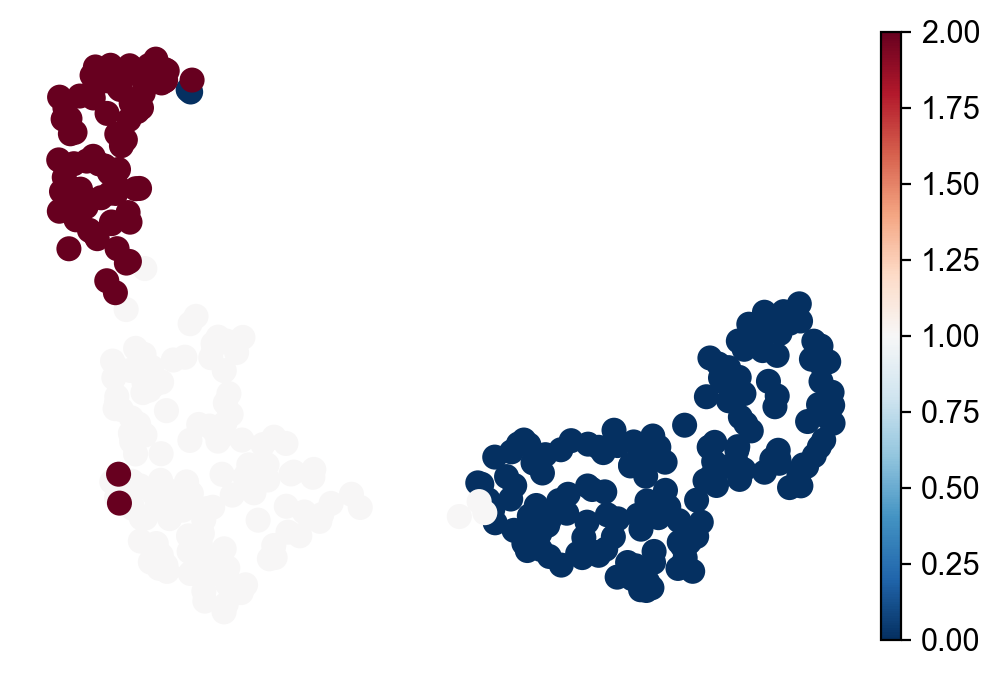

In [90]:
# plot umap to check
sc.pl.umap(adata, color='RNA_snn_res.1', frameon=False, legend_loc='on data', title='', save='_celltypes.pdf')


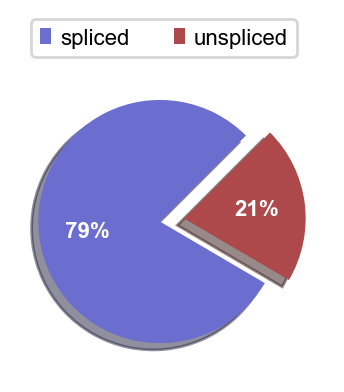

In [91]:

#scv.pl.proportions(adata,groupby='RNA_snn_res.1')
scv.pl.proportions(adata)

In [92]:
scv.pp.filter_genes(adata, min_shared_counts=5)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata,n_top_genes=20000)
scv.pp.log1p(adata)
##scv.pp.filter_and_normalize(adata,min_shared_counts=5,n_top_genes=20000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 2947 genes that are detected 5 counts (shared).
Normalized count data: X, spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [93]:
adata

AnnData object with n_obs × n_vars = 369 × 9294
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent_mito', 'percent_ribo', 'log10GenesPerUMI', 'pANN_0.25_0.11_28', 'DF.classifications_0.25_0.11_28', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'CC.Difference', 'AUC', 'S_G2M_AUC', 'RNA_snn_res.0.1', 'seurat_clusters', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.6', 'RNA_snn_res.0.8', 'RNA_snn_res.1', 'PC_1', 'PC_2', 'PC_3', 'PC_4', 'barcode', 'DC_1', 'DC_2', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr'
    uns: 'pca', 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

In [94]:
scv.tl.recover_dynamics(adata,n_jobs=80)
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)

recovering dynamics (using 80/88 cores)


/disk1/xilu/software/Miniconda3/envs/R-4/lib/python3.9/site-packages/scvelo/tools/dynamical_model.py:713: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/disk1/xilu/software/Miniconda3/envs/R-4/lib/python3.9/site-packages/scvelo/tools/dynamical_model.py:716: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


    finished (0:00:20) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/88 cores)
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


/disk1/xilu/software/Miniconda3/envs/R-4/lib/python3.9/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


In [95]:
# compute velocity
#scv.tl.velocity(adata, mode='stochastic')
#scv.tl.velocity_graph(adata)


In [96]:
#scv.tl.velocity_graph(adata)

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_pca', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_embedding.pdf


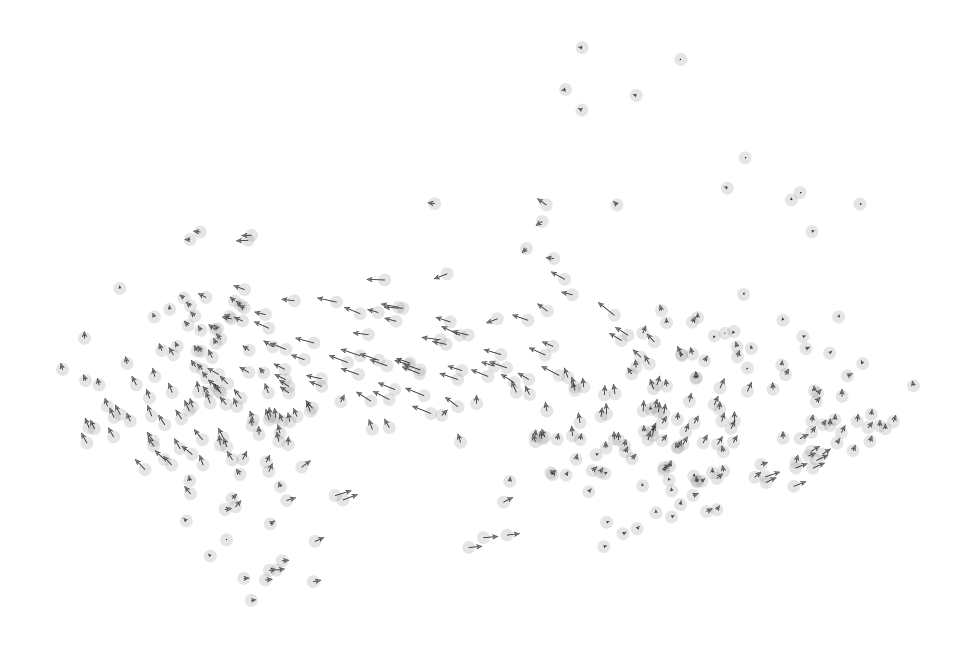

In [97]:
scv.pl.velocity_embedding(adata, basis='pca',save='embedding.pdf')


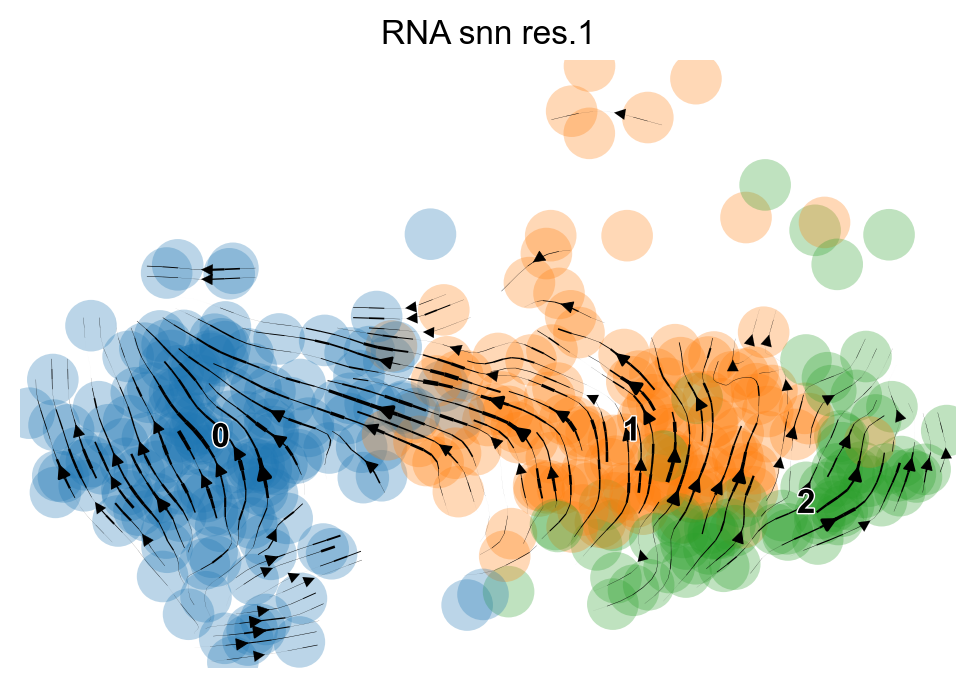

In [98]:
scv.pl.velocity_embedding_stream(adata, basis='pca',color='RNA_snn_res.1')

saving figure to file ./figures/scvelo_pca_2groups_embedding_stream.png


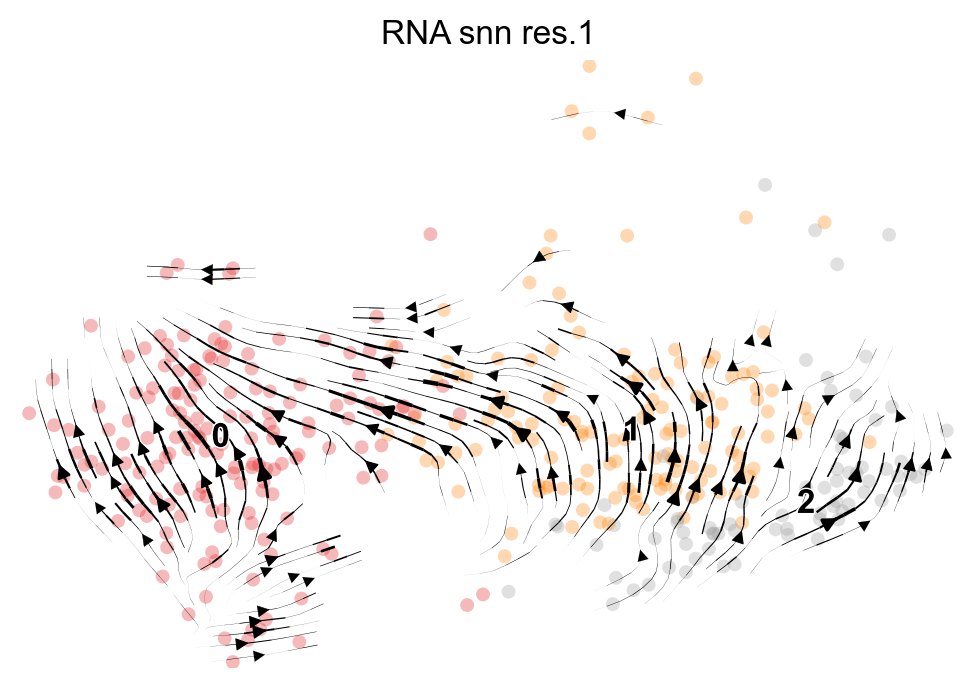

In [99]:
scv.pl.velocity_embedding_stream(adata, basis='pca',color='RNA_snn_res.1',size =100,save='pca_2groups_embedding_stream.png',palette='Set1')



In [100]:
df = adata.var
df

Accession Chromosome        End      Start Strand  \
LINC01128  ENSG00000228794.12          1     859446     825138      +   
SAMD11     ENSG00000187634.13          1     944575     923923      +   
NOC2L      ENSG00000188976.11          1     959309     944203      -   
PLEKHN1    ENSG00000187583.11          1     975865     966482      +   
HES4       ENSG00000188290.11          1    1000172     998962      -   
...                       ...        ...        ...        ...    ...   
BRCC3      ENSG00000185515.16          X  155123077  155071420      +   
VBP1       ENSG00000155959.12          X  155239841  155197007      +   
TMLHE      ENSG00000185973.12          X  155719098  155489011      -   
VAMP7      ENSG00000124333.16          X  155943769  155881345      +   
RPS4Y1     ENSG00000129824.16          Y    2932000    2841602      +   

           gene_count_corr    fit_r2  fit_alpha  fit_beta  fit_gamma  ...  \
LINC01128          -0.0949  0.051634   0.301889  4.141894   0.220242  ...   
SAMD11              0.1961  0.715203   0.150420  1.790327   0.519499  ...   
NOC2L               0.0645  0.087065        NaN       NaN        NaN  ...   
PLEKHN1             0.2747  0.380199   0.021615  0.211262   0.293663  ...   
HES4               -0.3069  0.773676        NaN       NaN        NaN  ...   
...                    ...       ...        ...       ...        ...  ...   
BRCC3               0.0869 -0.717838        NaN       NaN        NaN  ...   
VBP1                0.0212 -0.274751        NaN       NaN        NaN  ...   
TMLHE               0.2880  0.433066   0.050267  0.190497   0.247462  ...   
VAMP7               0.0521 -0.166022        NaN       NaN        NaN  ...   
RPS4Y1              0.1031  0.679281   1.075339  9.256295   0.440089  ...   

           fit_std_s  fit_likelihood  fit_u0  fit_s0  fit_pval_steady  \
LINC01128   0.137260        0.186116     0.0     0.0     3.726892e-01   
SAMD11      0.074368        0.366291     0.0     0.0     3.401344e-01   
NOC2L            NaN             NaN     NaN     NaN              NaN   
PLEKHN1     0.019426        0.256588     0.0     0.0     6.063708e-08   
HES4             NaN             NaN     NaN     NaN              NaN   
...              ...             ...     ...     ...              ...   
BRCC3            NaN             NaN     NaN     NaN              NaN   
VBP1             NaN             NaN     NaN     NaN              NaN   
TMLHE       0.066760        0.421979     0.0     0.0     1.010290e-01   
VAMP7            NaN             NaN     NaN     NaN              NaN   
RPS4Y1      0.564273        0.423135     0.0     0.0     4.687627e-01   

           fit_steady_u  fit_steady_s  fit_variance  fit_alignment_scaling  \
LINC01128      0.061994      0.434832      1.524466               1.497195   
SAMD11         0.062568      0.190498      0.408225               1.699914   
NOC2L               NaN           NaN           NaN                    NaN   
PLEKHN1        0.094203      0.054252      0.754644               1.286779   
HES4                NaN           NaN           NaN                    NaN   
...                 ...           ...           ...                    ...   
BRCC3               NaN           NaN           NaN                    NaN   
VBP1                NaN           NaN           NaN                    NaN   
TMLHE          0.252708      0.166071      0.250271               3.179798   
VAMP7               NaN           NaN           NaN                    NaN   
RPS4Y1         0.062580      1.880943      0.289752               2.709562   

           velocity_genes  
LINC01128            True  
SAMD11               True  
NOC2L               False  
PLEKHN1              True  
HES4                False  
...                   ...  
BRCC3               False  
VBP1                False  
TMLHE                True  
VAMP7               False  
RPS4Y1              False  

[9294 rows x 23 columns]

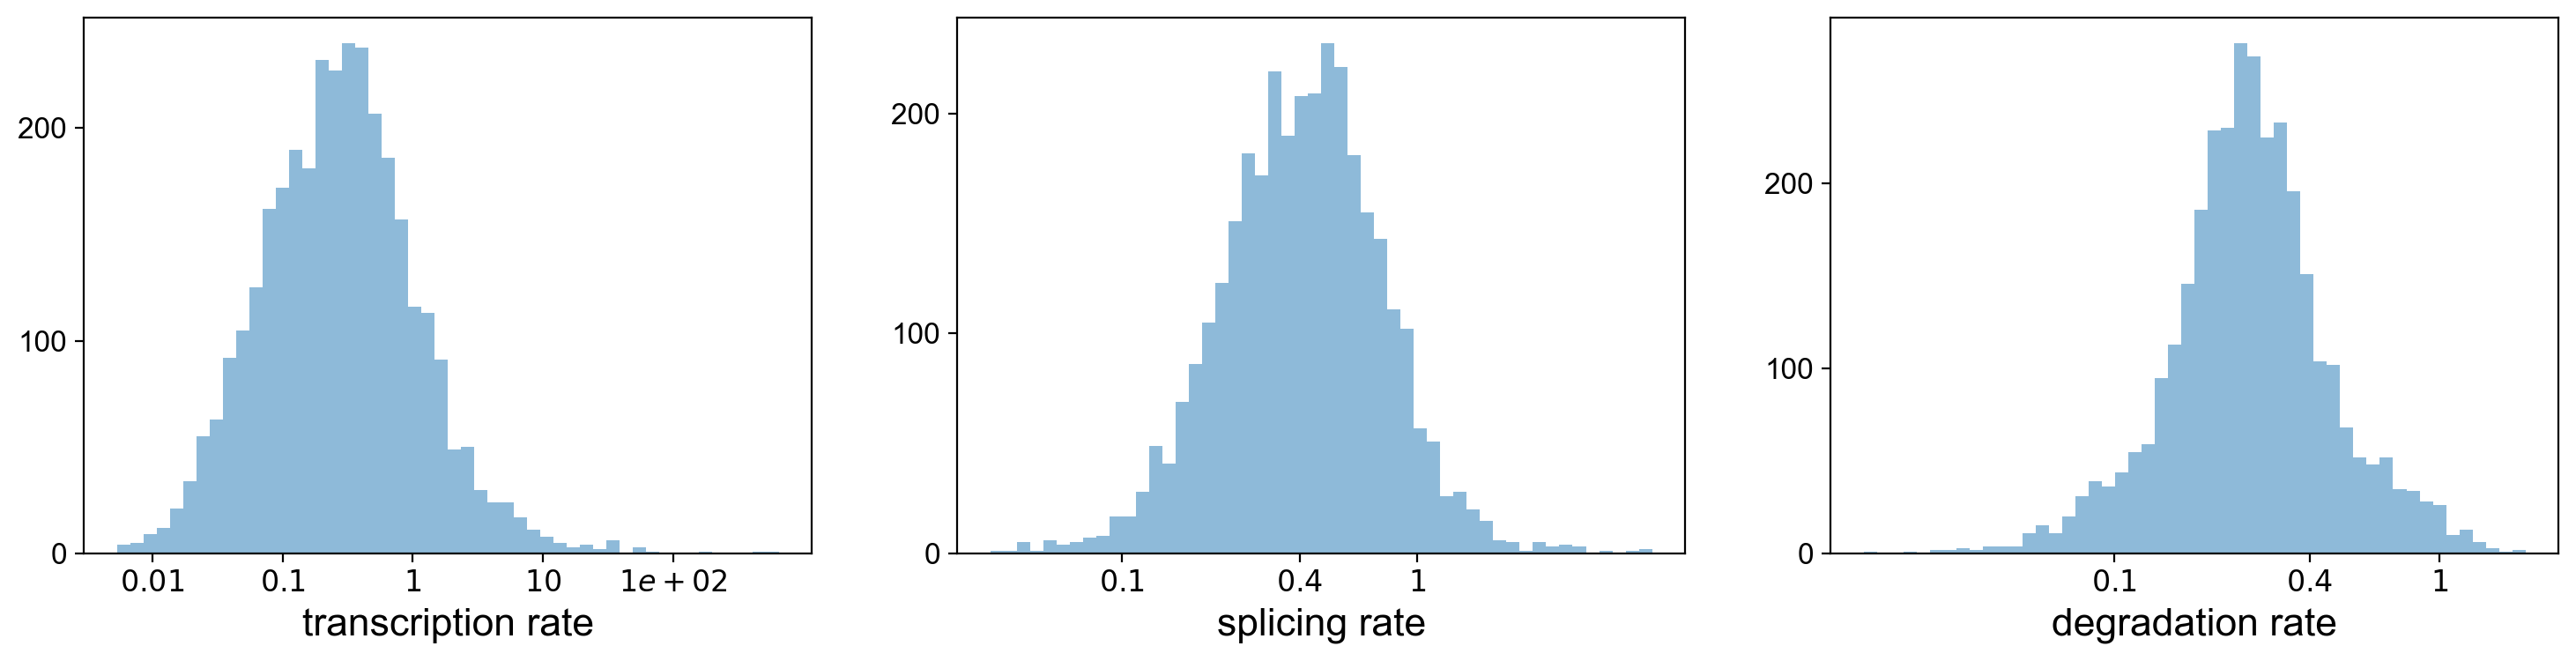

/disk1/xilu/software/Miniconda3/envs/R-4/lib/python3.9/site-packages/scvelo/core/_anndata.py:311: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.var_names = df.index


fit_r2  fit_alpha  fit_beta  fit_gamma     fit_t_  fit_scaling  \
LINC01128  0.051634   0.301889  4.141894   0.220242   4.567089     0.072566   
SAMD11     0.715203   0.150420  1.790327   0.519499  10.041731     0.147861   
PLEKHN1    0.380199   0.021615  0.211262   0.293663  12.612895     2.876313   
ISG15      0.208463   4.452926  2.446255   0.076818  19.732756     0.038202   
C1orf159   0.675251   0.028668  0.534983   0.238050  14.074778     0.946812   

           fit_std_u  fit_std_s  fit_likelihood  fit_u0  fit_s0  \
LINC01128   0.022134   0.137260        0.186116     0.0     0.0   
SAMD11      0.024436   0.074368        0.366291     0.0     0.0   
PLEKHN1     0.034332   0.019426        0.256588     0.0     0.0   
ISG15       0.538997   7.407360        0.252210     0.0     0.0   
C1orf159    0.019584   0.032060        0.316950     0.0     0.0   

           fit_pval_steady  fit_steady_u  fit_steady_s  fit_variance  \
LINC01128     3.726892e-01      0.061994      0.434832      1.524466   
SAMD11        3.401344e-01      0.062568      0.190498      0.408225   
PLEKHN1       6.063708e-08      0.094203      0.054252      0.754644   
ISG15         4.982103e-01      1.633869     30.875834      0.828836   
C1orf159      9.696940e-04      0.054433      0.097917      0.541378   

           fit_alignment_scaling  
LINC01128               1.497195  
SAMD11                  1.699914  
PLEKHN1                 1.286779  
ISG15                   5.350395  
C1orf159                2.322748

In [101]:
df = adata.var
df = df[(df['fit_likelihood'] > .1) & df['velocity_genes'] == True]

kwargs = dict(xscale='log', fontsize=16)
with scv.GridSpec(ncols=3) as pl:
    pl.hist(df['fit_alpha'], xlabel='transcription rate', **kwargs)
    pl.hist(df['fit_beta'] * df['fit_scaling'], xlabel='splicing rate', xticks=[.1, .4, 1], **kwargs)
    pl.hist(df['fit_gamma'], xlabel='degradation rate', xticks=[.1, .4, 1], **kwargs)

scv.get_df(adata, 'fit*', dropna=True).head()


In [102]:
scv.tl.latent_time(adata)

computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


saving figure to file ./figures/scvelo_group3_latent_time.pca.pdf


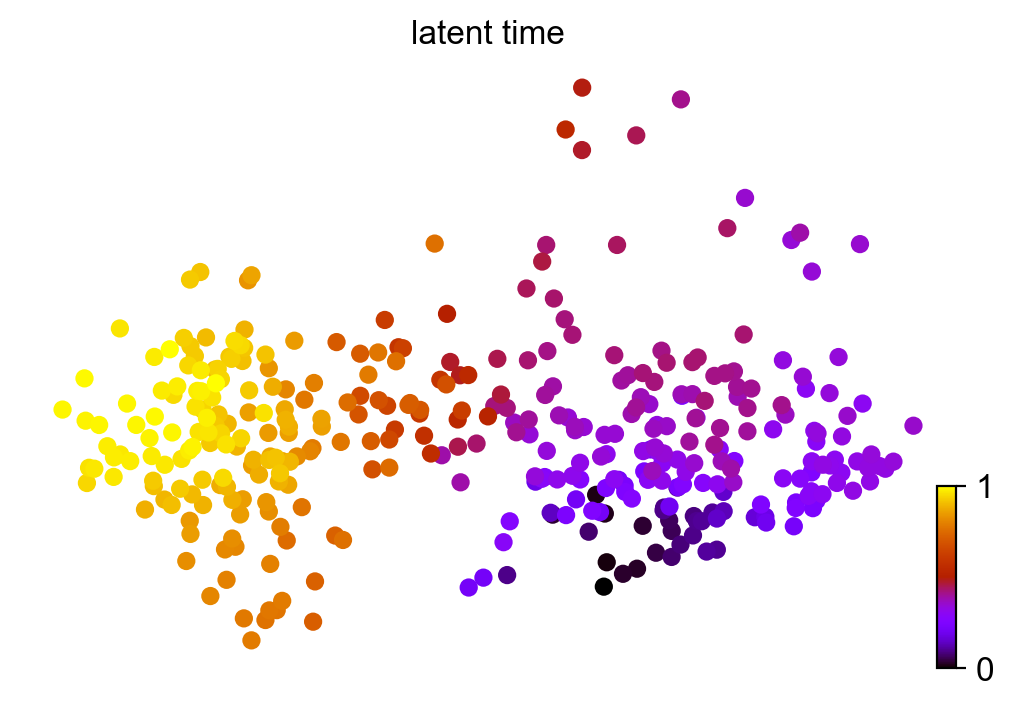

In [103]:
scv.pl.scatter(adata, color='latent_time', cmap='gnuplot',basis="pca",save="group3_latent_time.pca.pdf")

saving figure to file ./figures/scvelo_heatmap_group3_laternt.time.pdf


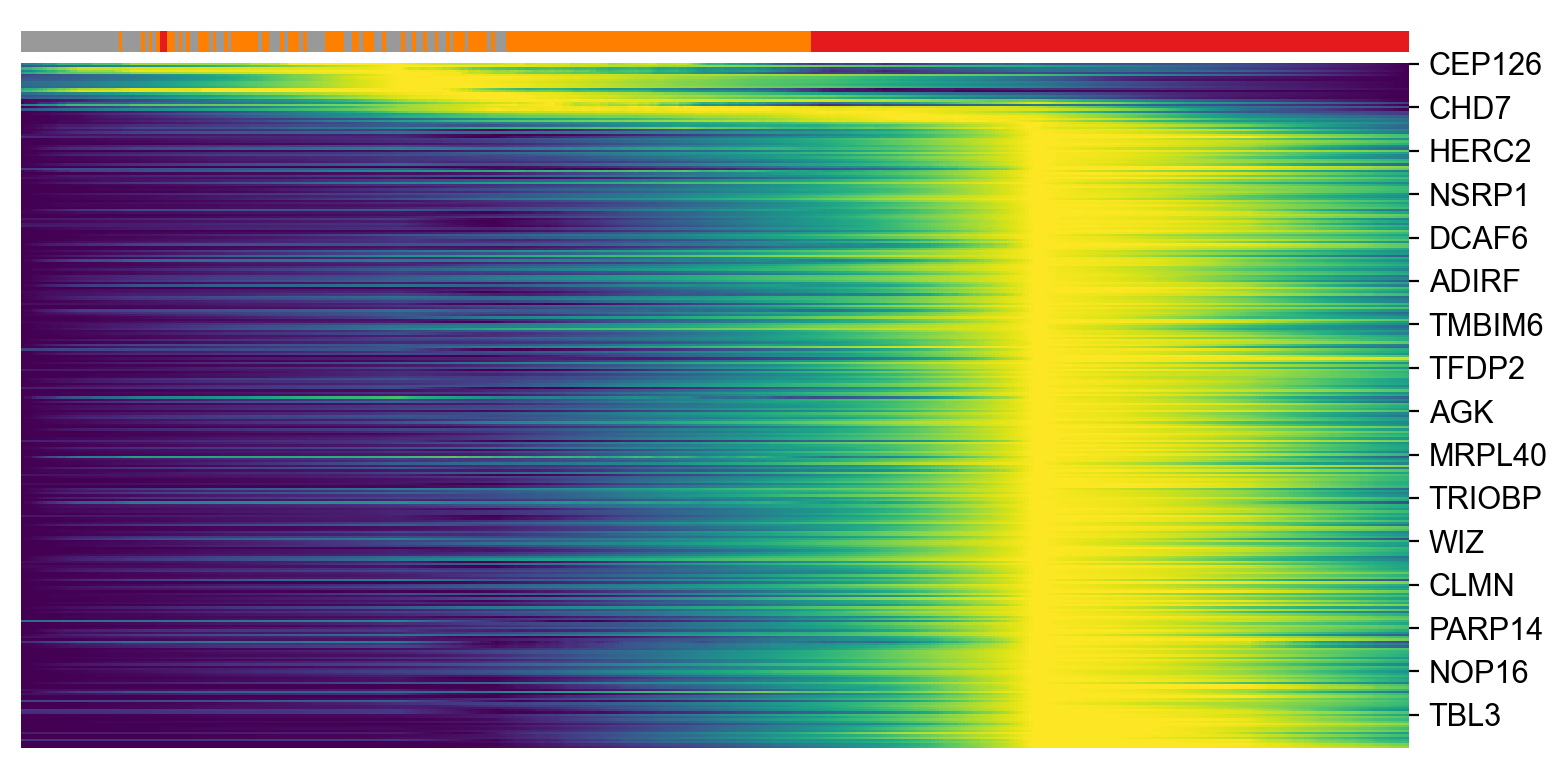

In [104]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata, var_names=top_genes, sortby='latent_time', col_color='RNA_snn_res.1', n_convolve=200,save="group3_laternt.time.pdf")

In [105]:
top_genes

Index(['DNPH1', 'HTATIP2', 'HMBS', 'NPW', 'BCKDK', 'NDUFA2', 'QDPR', 'RNF181',
       'TRIOBP', 'FAM172A',
       ...
       'TEX2', 'GOSR1', 'HLCS', 'CALD1', 'ANAPC16', 'HSDL2', 'SLC12A6',
       'RPS12', 'LMAN2L', 'MAP2K2'],
      dtype='object', length=300)

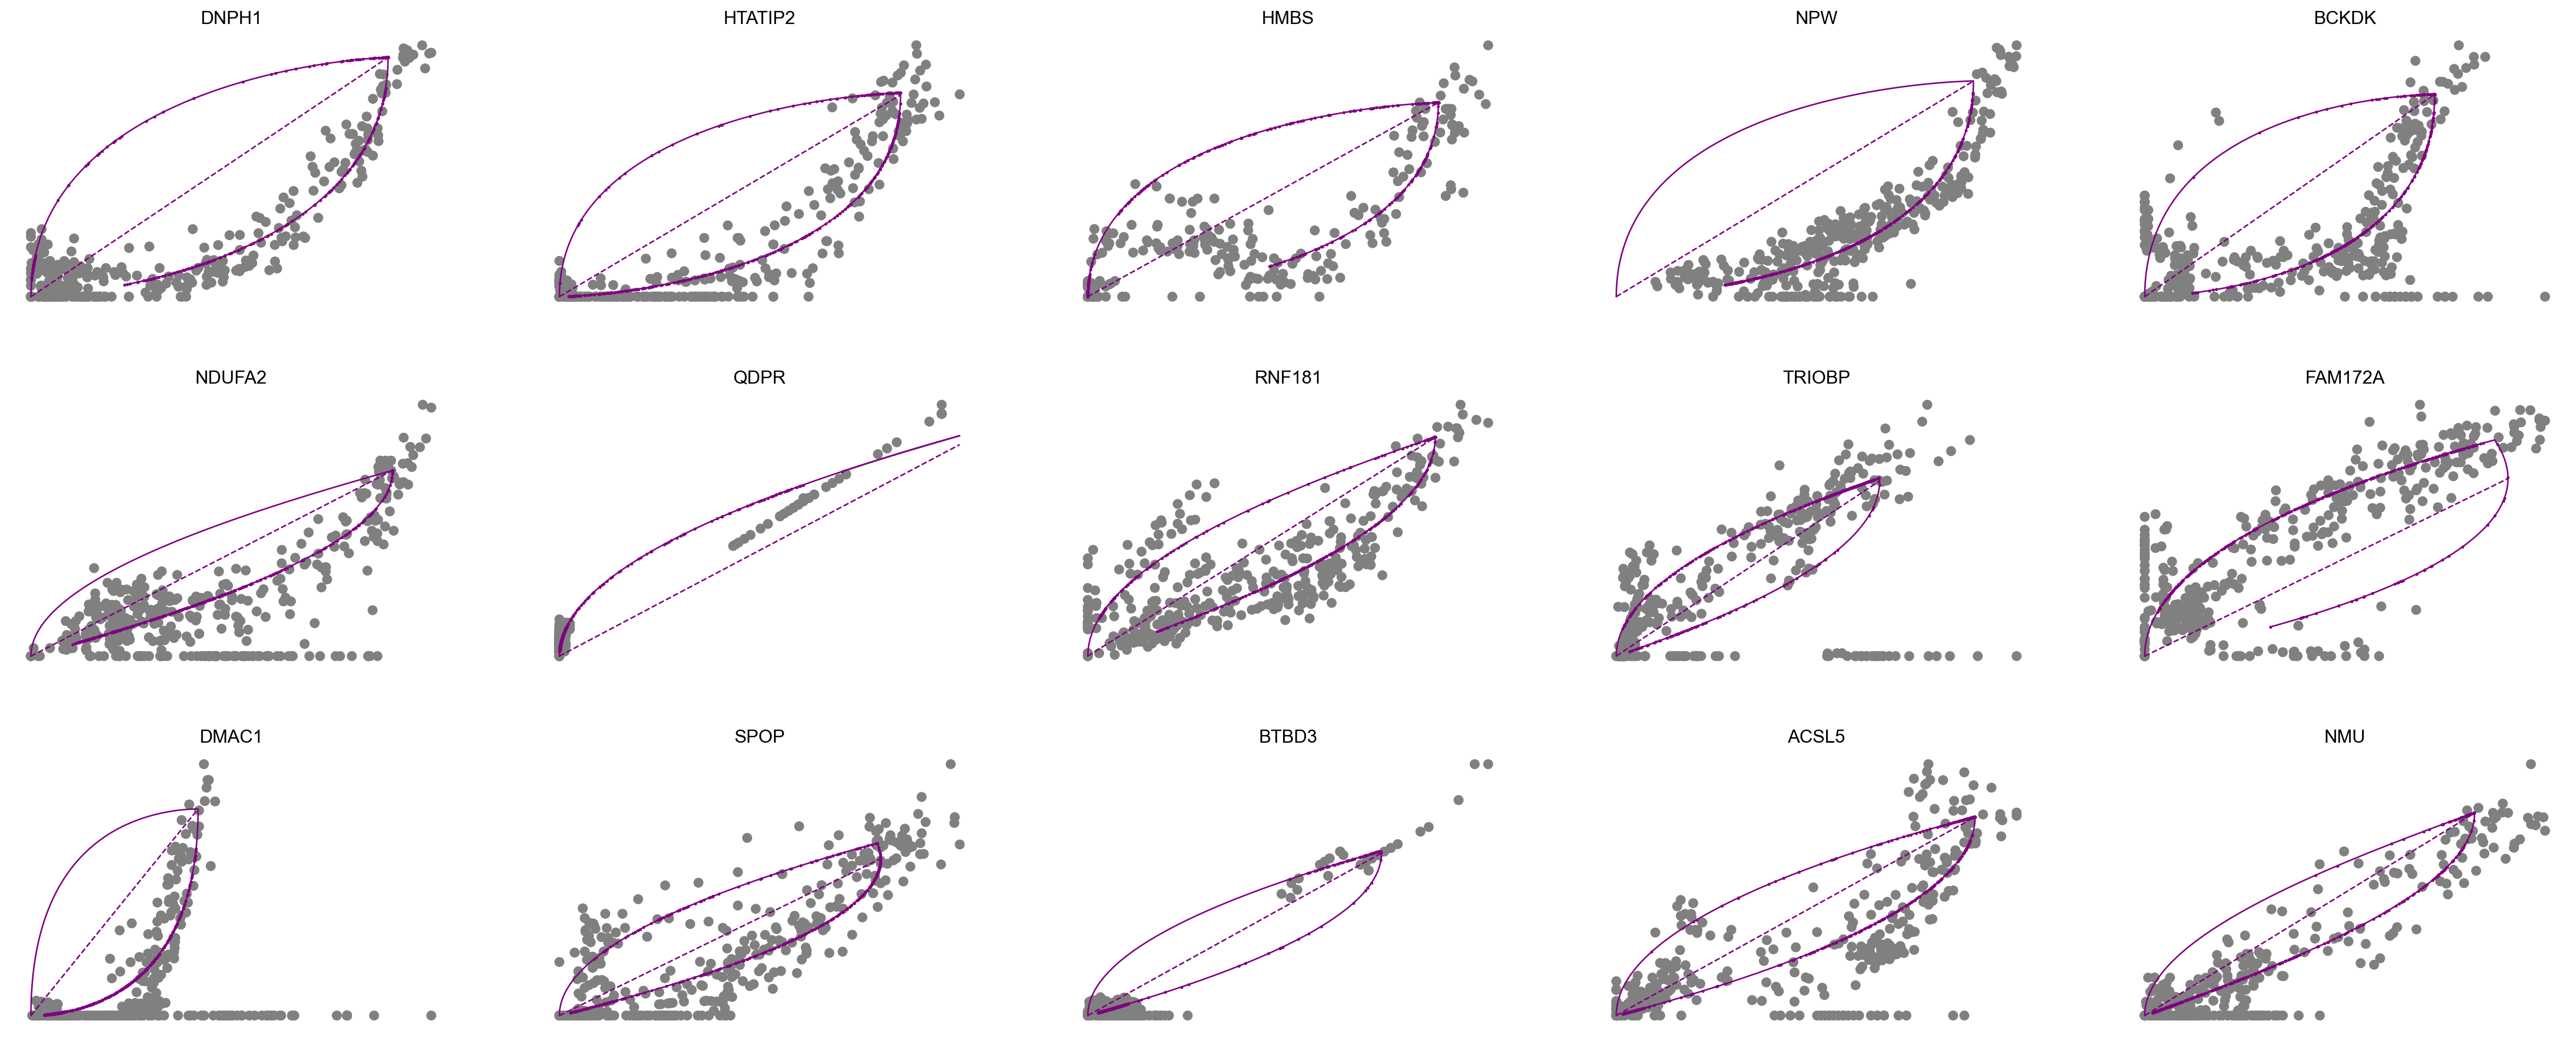

In [106]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index
scv.pl.scatter(adata, basis=top_genes[:15], ncols=5, frameon=False)

In [107]:
#var_names = ['KIF14','MIK67','CDKN1A']
#scv.pl.scatter(adata, var_names, frameon=False)
#scv.pl.scatter(adata, x='latent_time', y=var_names, frameon=False)

/disk1/xilu/software/Miniconda3/envs/R-4/lib/python3.9/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


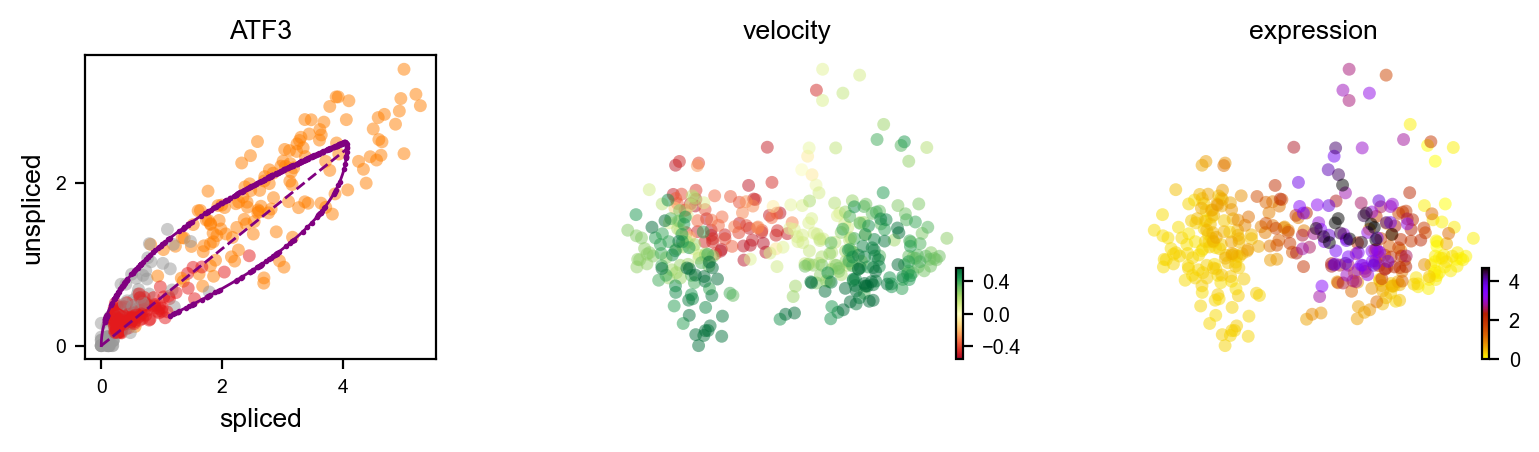

In [108]:
scv.pl.velocity(adata, var_names=['ATF3'], color='RNA_snn_res.1',basis="pca")

/disk1/xilu/software/Miniconda3/envs/R-4/lib/python3.9/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


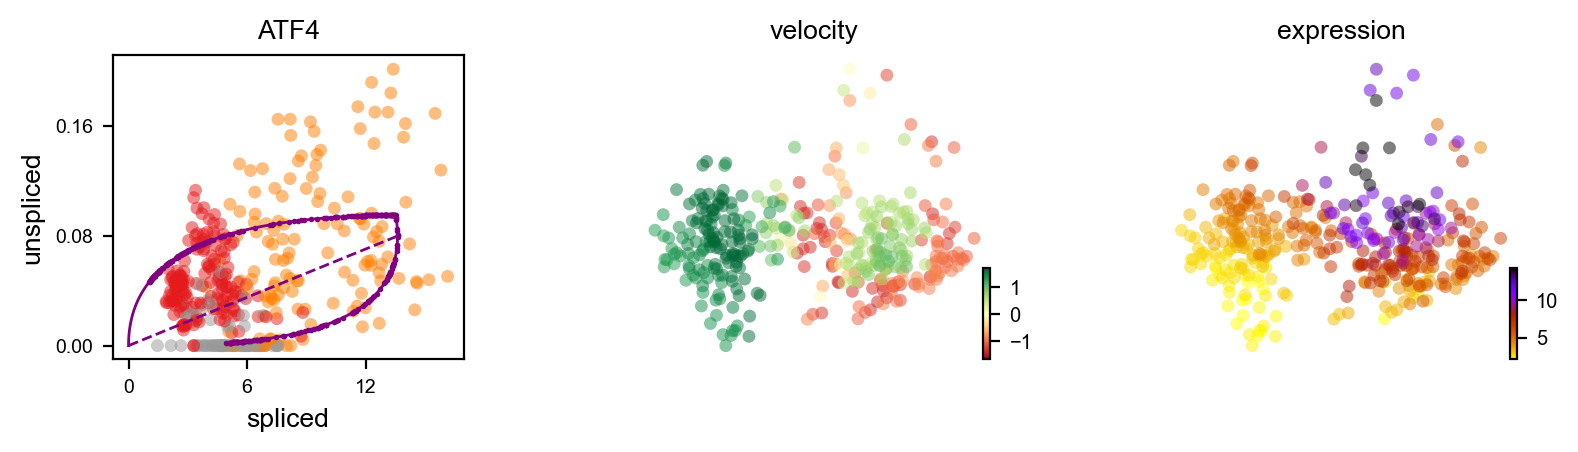

In [109]:
scv.pl.velocity(adata, var_names=['ATF4'], color='RNA_snn_res.1',basis="pca")

/disk1/xilu/software/Miniconda3/envs/R-4/lib/python3.9/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


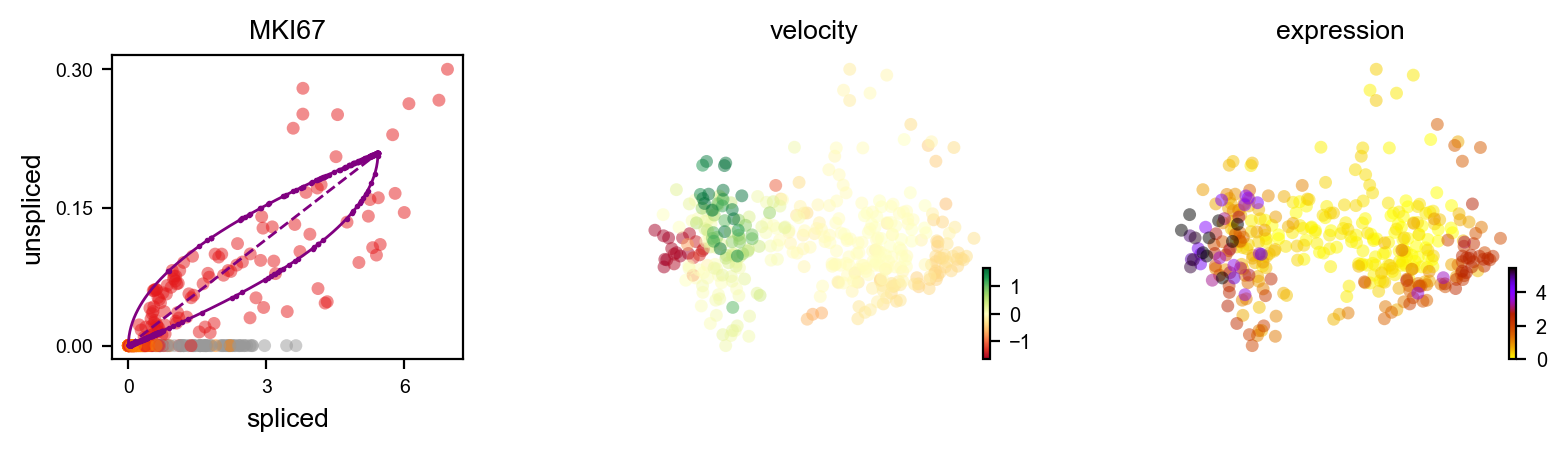

In [110]:
scv.pl.velocity(adata, var_names=['MKI67'], color='RNA_snn_res.1',basis="pca")

In [111]:
scv.tl.rank_dynamical_genes(adata, groupby='RNA_snn_res.1',n_genes=500)
df2 = scv.get_df(adata, 'rank_dynamical_genes/names')
df2.head(500)


ranking genes by cluster-specific likelihoods
    finished (0:00:00) --> added 
    'rank_dynamical_genes', sorted scores by group ids (adata.uns)


0       1       2
0      DNPH1     WIZ    QDPR
1    HTATIP2   RPS29   IFI27
2      OXLD1  TMSB10    CLPB
3        NPW  RNF181   RPS12
4     MALAT1    CLMN   RBM26
..       ...     ...     ...
495    RTL8C  MBOAT1  PPP3CC
496      BLM   ERO1A   HSBP1
497     PUS1    WNK1  SYCE1L
498  CCDC137   SZRD1  CFAP97
499     TYW1   MAPK6    MGMT

[500 rows x 3 columns]

In [112]:
df2.to_csv("data_3group_dyna.csv")

In [113]:
#downstream analysis
scv.tl.rank_velocity_genes(adata, groupby='RNA_snn_res.1', min_corr=.5,n_genes=500)

ranking velocity genes
    finished (0:00:01) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


In [114]:
df = scv.DataFrame(adata.uns['rank_velocity_genes']['names'])
df.head(500)

0       1        2
0    LINC02832  POLR2B     LAP3
1       EIF4G3   MED10   DALRD3
2         HRH1  NPLOC4    TUSC2
3       UNC13A    EPS8    GSTP1
4      C9orf85  LUC7L3     QDPR
..         ...     ...      ...
495       ELOB  SRGAP2     FBH1
496      PRDX1   FOXJ3   TRIM36
497      RREB1    PSD3    WDR54
498      VGLL4    SIK2  C1GALT1
499      DCAF1    MIB1    PTPN3

[500 rows x 3 columns]

In [115]:
df.to_csv("data_3group.csv")

In [116]:
kwargs = dict(frameon=False, size=10, linewidth=1.5,
              add_outline='edge')

In [117]:
#scv.pl.scatter(adata, df['edge'][:3], ylabel='AF6', frameon=False, color='RNA_snn_res.1', size=10, linewidth=1.5)

In [118]:
#scv.pl.scatter(adata, df['core'][:3], ylabel='AF6', frameon=False, color='RNA_snn_res.1', size=10, linewidth=1.5)

calculating cell cycle phase
-->     'S_score' and 'G2M_score', scores of cell cycle phases (adata.obs)


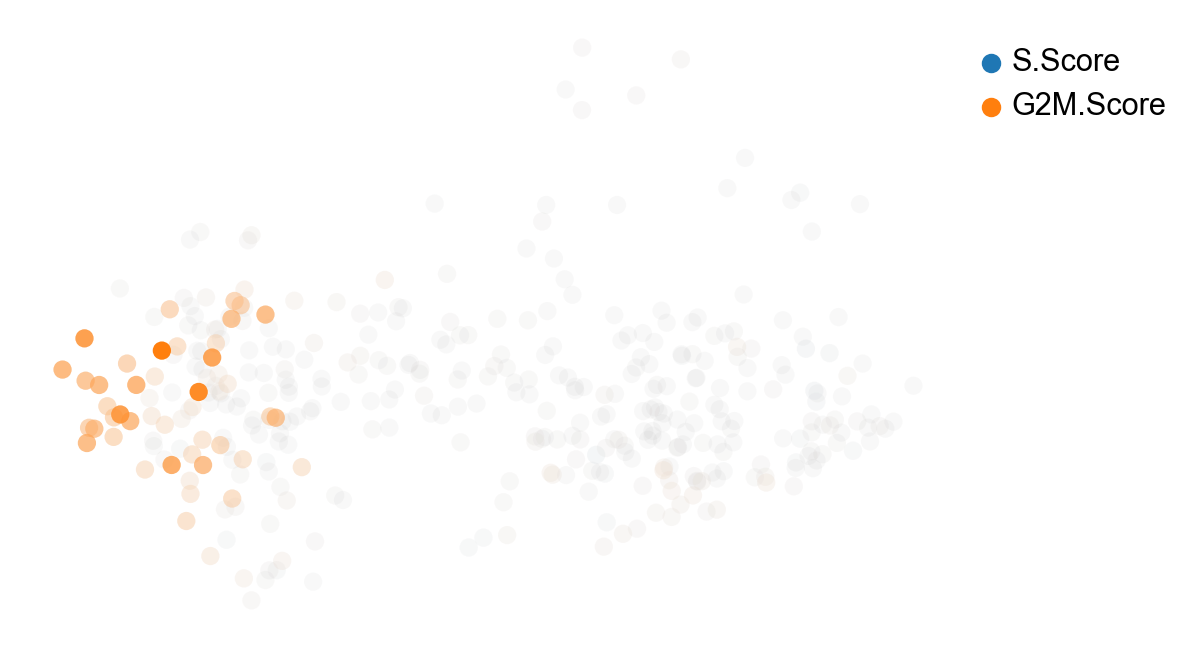

In [119]:
scv.tl.score_genes_cell_cycle(adata)
scv.pl.scatter(adata, color_gradients=['S.Score', 'G2M.Score'], smooth=True, perc=[5, 95],basis="pca")

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


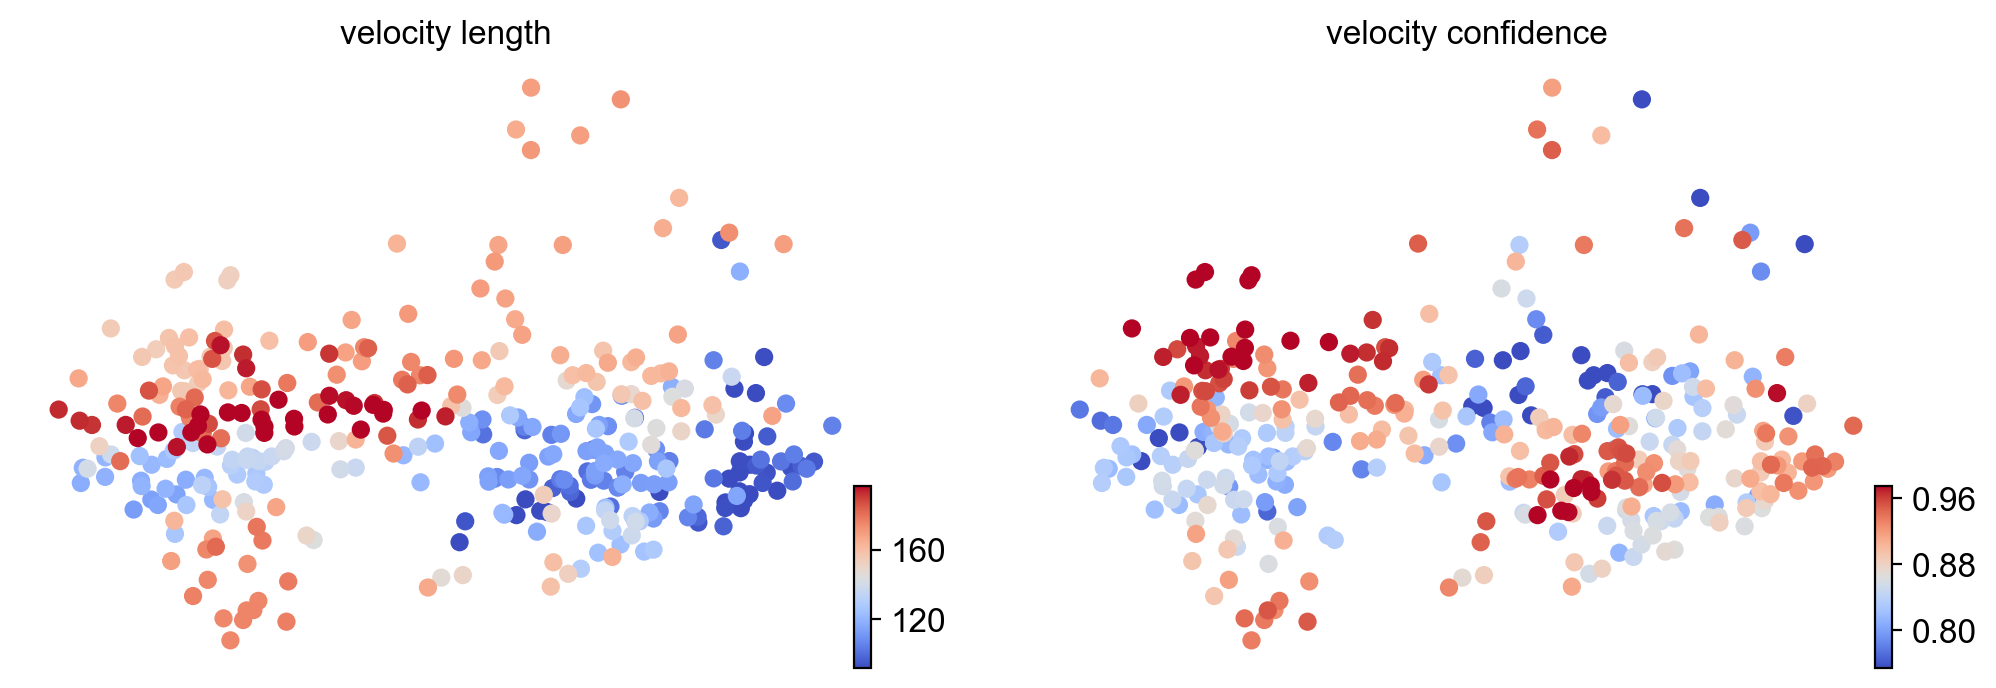

In [120]:
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95],basis = "pca")

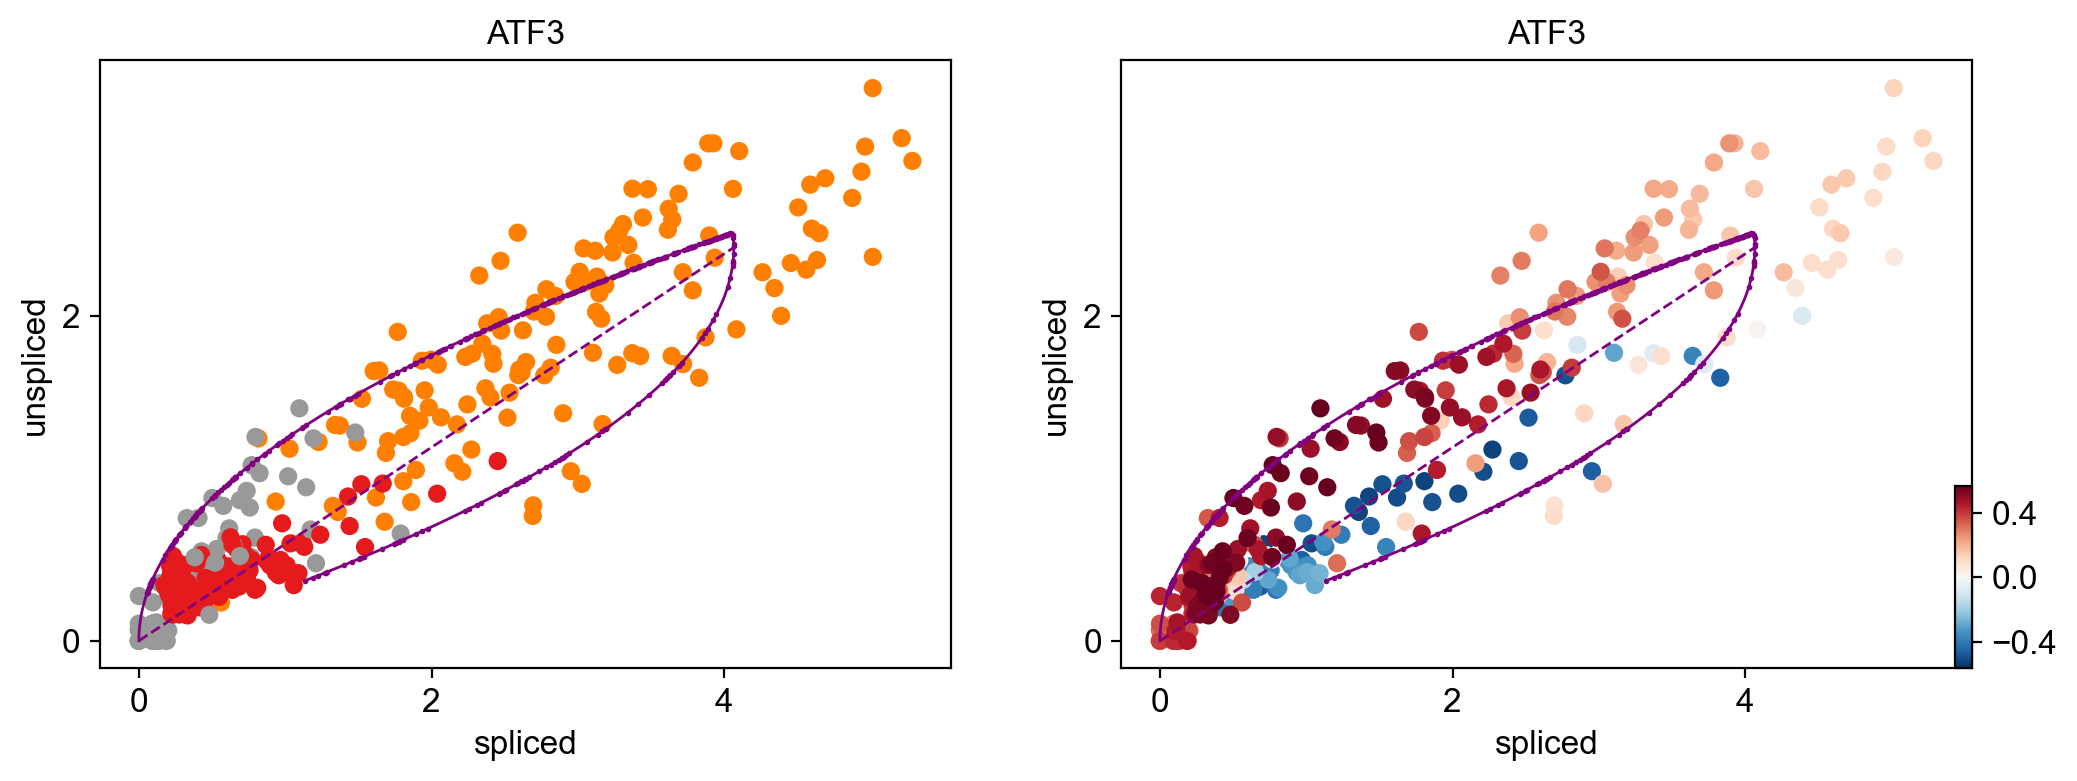

In [121]:
scv.pl.scatter(adata, 'ATF3', color=['RNA_snn_res.1', 'velocity'])

/disk1/xilu/software/Miniconda3/envs/R-4/lib/python3.9/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


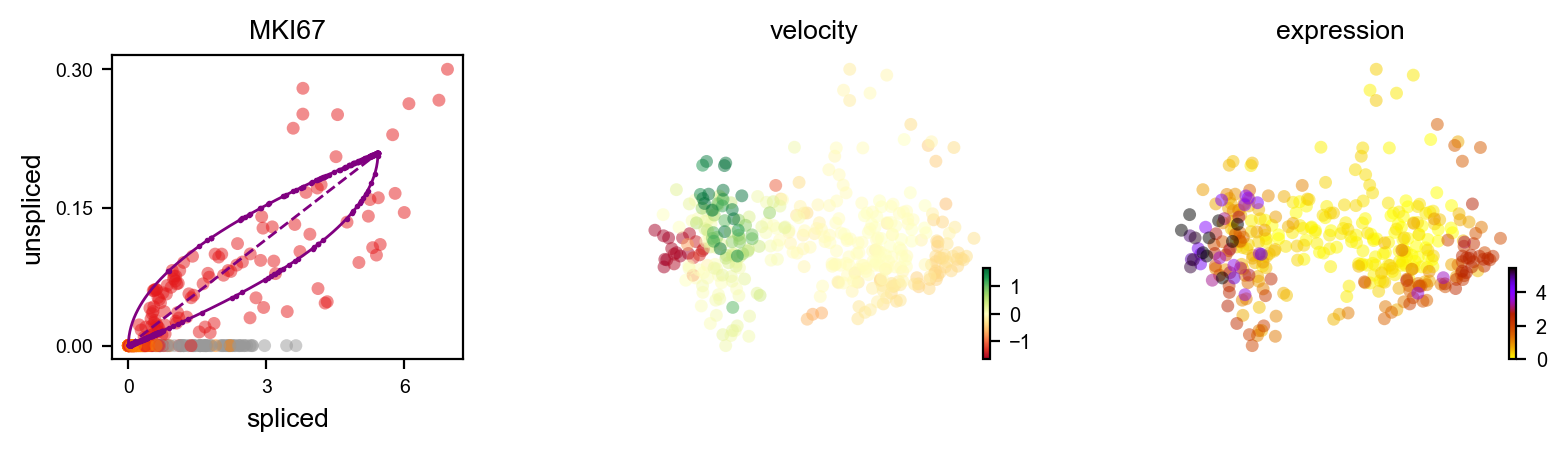

In [122]:
scv.pl.velocity(adata, var_names=['MKI67'], color='RNA_snn_res.1',basis="pca")

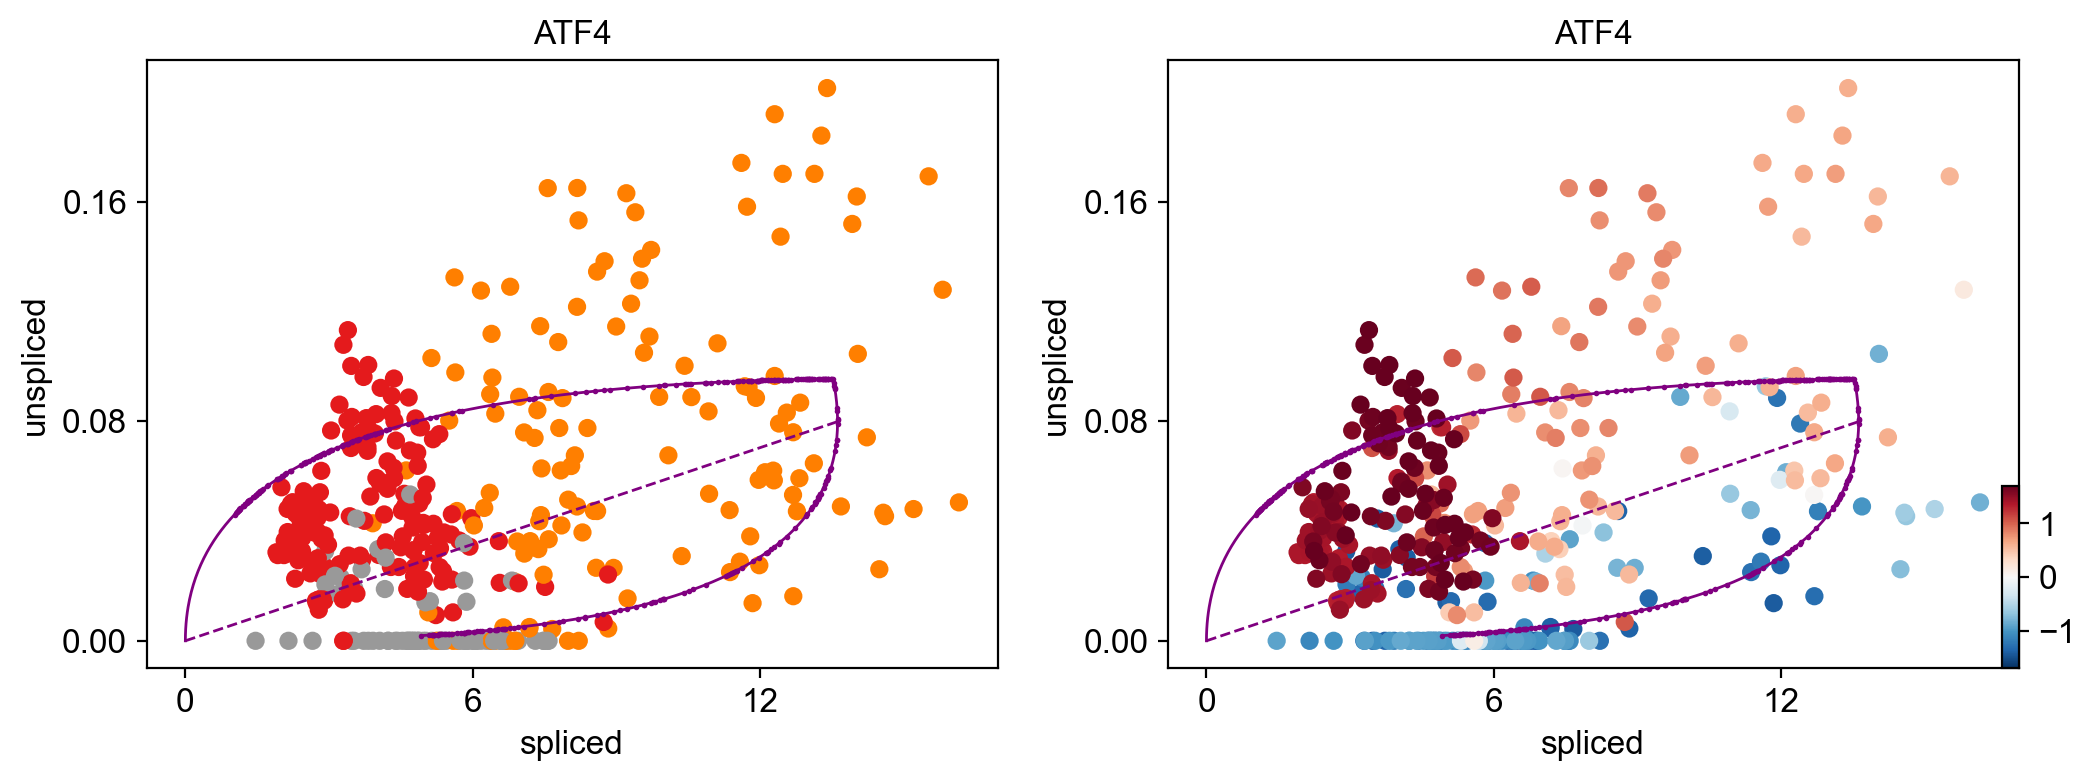

In [123]:
scv.pl.scatter(adata, 'ATF4', color=['RNA_snn_res.1', 'velocity'])

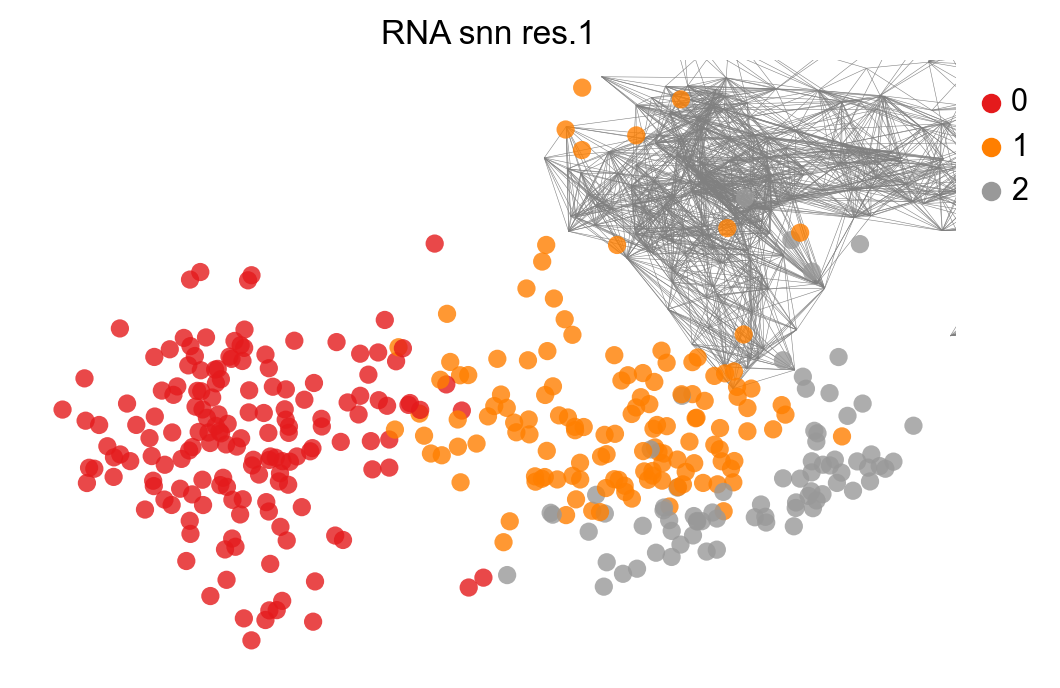

In [124]:
scv.pl.velocity_graph(adata, threshold=0.05, color='RNA_snn_res.1',basis="pca")


In [125]:
df = adata.obs.groupby('RNA_snn_res.1')[keys].mean().T
df.style.background_gradient(cmap='coolwarm', axis=1)

In [127]:
# this is needed due to a current bug - bugfix is coming soon.
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']

In [128]:
scv.tl.paga(adata, groups='RNA_snn_res.1')
#df = scv.get_df(adata, 'paga/transitions_confidence', precision=2).T
#df.style.background_gradient(cmap='Blues').format('{:.2g}')


running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


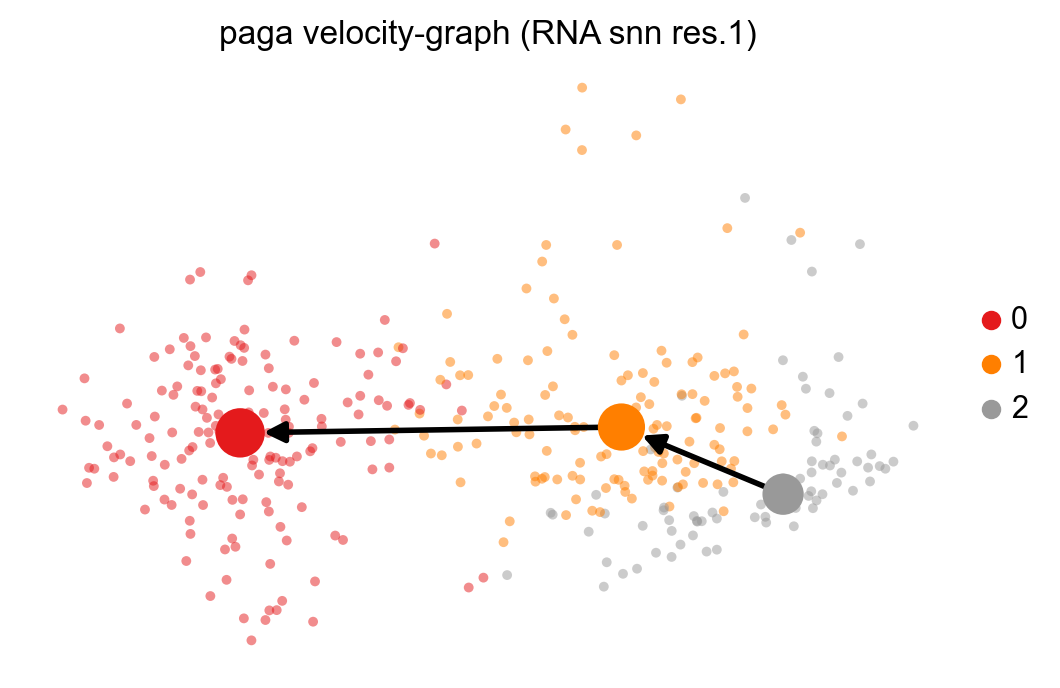

In [130]:
scv.pl.paga(adata, basis='pca', size=50, alpha=.5,
            min_edge_width=2, node_size_scale=1.5)